# 新北市住宅房價分析
## 1)載入dataset

下載資源：內政部不動產成交案件實際資訊資料供應系統 2017~2022房屋買賣交易




In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_sell=pd.read_csv('newtaipei_sell.csv',encoding='utf-8')

## 2)資料清理

1. 刪除重複資料

In [3]:
df_sell.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342513 entries, 0 to 342528
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   鄉鎮市區           342513 non-null  object
 1   交易標的           342513 non-null  object
 2   土地位置建物門牌       342513 non-null  object
 3   土地移轉總面積平方公尺    342513 non-null  object
 4   都市土地使用分區       317010 non-null  object
 5   非都市土地使用分區      21758 non-null   object
 6   非都市土地使用編定      21679 non-null   object
 7   交易年月日          342513 non-null  object
 8   交易筆棟數          342513 non-null  object
 9   移轉層次           296867 non-null  object
 10  總樓層數           296861 non-null  object
 11  建物型態           342513 non-null  object
 12  主要用途           296844 non-null  object
 13  主要建材           296906 non-null  object
 14  建築完成年月         288478 non-null  object
 15  建物移轉總面積平方公尺    342513 non-null  object
 16  建物現況格局-房       342513 non-null  object
 17  建物現況格局-廳       342513 non-null  object
 18  建物現況

2. 篩選出住宅(交易標的非單筆土地且非單筆車位，單價不可為空值，土地使用為住)，得到資料筆數為**187956**筆

In [4]:
df_resident=df_sell[(df_sell['交易標的']!='土地')&(df_sell['交易標的']!='車位')& (df_sell['單價元平方公尺'].notnull())&(df_sell['都市土地使用分區']=='住')]

In [5]:
df_resident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187956 entries, 5 to 342528
Data columns (total 34 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   鄉鎮市區           187956 non-null  object
 1   交易標的           187956 non-null  object
 2   土地位置建物門牌       187956 non-null  object
 3   土地移轉總面積平方公尺    187956 non-null  object
 4   都市土地使用分區       187956 non-null  object
 5   非都市土地使用分區      0 non-null       object
 6   非都市土地使用編定      0 non-null       object
 7   交易年月日          187956 non-null  object
 8   交易筆棟數          187956 non-null  object
 9   移轉層次           187877 non-null  object
 10  總樓層數           187906 non-null  object
 11  建物型態           187956 non-null  object
 12  主要用途           187908 non-null  object
 13  主要建材           187938 non-null  object
 14  建築完成年月         182175 non-null  object
 15  建物移轉總面積平方公尺    187956 non-null  object
 16  建物現況格局-房       187956 non-null  object
 17  建物現況格局-廳       187956 non-null  object
 18  建物現況

3. 取出所需資料欄位

In [6]:
new_df_resident=df_resident[['鄉鎮市區','土地位置建物門牌','年份','建物移轉總面積平方公尺','總價元','單價元平方公尺']]

4. 將數字string轉換資料型態為float

In [7]:
new_df_resident[['建物移轉總面積平方公尺','總價元','單價元平方公尺']]=new_df_resident[['建物移轉總面積平方公尺','總價元','單價元平方公尺']].astype('float')

In [8]:
new_df_resident.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187956 entries, 5 to 342528
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   鄉鎮市區         187956 non-null  object 
 1   土地位置建物門牌     187956 non-null  object 
 2   年份           187956 non-null  int64  
 3   建物移轉總面積平方公尺  187956 non-null  float64
 4   總價元          187956 non-null  float64
 5   單價元平方公尺      187956 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.0+ MB


5. 將總價轉換以萬元表示，將單價轉換以每單位坪表示

In [9]:
new_df_resident['總價元(萬)']=new_df_resident['總價元']*0.0001
new_df_resident['單價元坪(萬)']=new_df_resident['單價元平方公尺']*3.3*0.0001

6. 篩選出一般住宅的面積為**70>面積>500**

In [10]:
new_df_resident_L=new_df_resident[(new_df_resident['建物移轉總面積平方公尺']<500)&(new_df_resident['建物移轉總面積平方公尺']>70)]

In [11]:
new_df_resident_L.sort_values('建物移轉總面積平方公尺', ascending=True).head(20)

,鄉鎮市區,土地位置建物門牌,年份,建物移轉總面積平方公尺,總價元,單價元平方公尺,總價元(萬),單價元坪(萬)
228185,新店區,新北市新店區松林路６號七樓之二十四,2019,70.01,2500000.0,35709.0,250.0,11.78397
320694,新店區,新北市新店區松林路６號三樓之二十四,2017,70.01,2880000.0,41137.0,288.0,13.57521
137331,新店區,新北市新店區松林路6號7樓之18,2020,70.01,3100000.0,44279.0,310.0,14.61207
122438,新店區,新北市新店區松林路6號9樓之18,2020,70.01,2050000.0,29282.0,205.0,9.66306
104268,新店區,新北市新店區松林路６號四樓之十八,2021,70.01,3300000.0,47136.0,330.0,15.55488
141061,新店區,新北市新店區松林路６號三樓之二十四,2020,70.01,2850000.0,40708.0,285.0,13.43364
125641,新店區,新北市新店區松林路６號六樓之十八,2020,70.01,2200000.0,31424.0,220.0,10.36992
341648,三重區,新北市三重區中正南路２２９號３樓,2017,70.01,9500000.0,135714.0,950.0,44.78562
195442,新店區,新北市新店區松林路６號八樓之十九,2019,70.01,2800000.0,39994.0,280.0,13.19802
272017,蘆洲區,新北市蘆洲區長安街２６７巷１１號五樓,2018,70.01,7060000.0,100843.0,706.0,33.27819


## 3)資料EDA
1. 匯出沙盒圖顯示資料離群狀況，整個沙盒都看不到，表示有差距很大的離群值，

利用quantile()算出四分位距，取出區間。

<Axes: ylabel='總價元(萬)'>

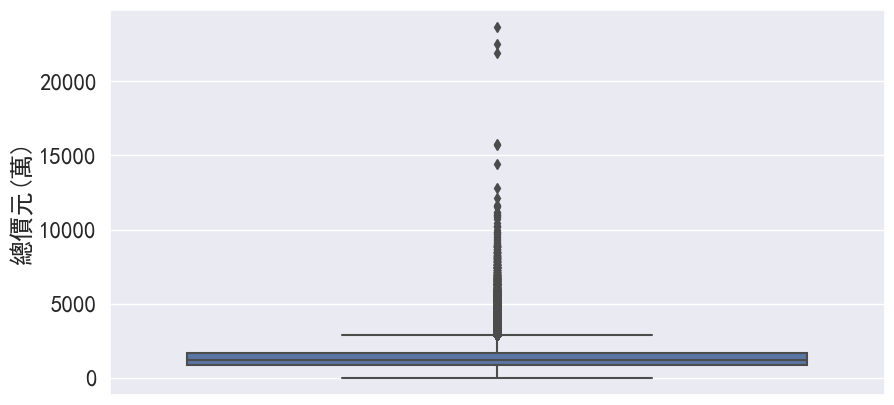

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(10,5),"font.sans-serif":'simhei'},font_scale=1.5)
sns.boxplot(y=new_df_resident_L["總價元(萬)"])

In [13]:
Q1_t=new_df_resident_L["總價元(萬)"].quantile(0.25)
Q3_t=new_df_resident_L["總價元(萬)"].quantile(0.75)
IQR_t=Q3_t-Q1_t
#Q1_p=new_df_resident["單價元坪(萬)"].quantile(0.25)
#Q3_p=new_df_resident["單價元坪(萬)"].quantile(0.75)
#IQR_p=Q3_p-Q1_p
#new_df_resident["總價元(萬)"]<(Q1-1.5*IQR)
#new_df_resident["總價元(萬)"]<(Q1-1.5*IQR)


            
new_df_resident_without=new_df_resident_L[((new_df_resident_L["總價元(萬)"]>(Q1_t-1.5*IQR_t))
                                         &(new_df_resident_L["總價元(萬)"]<(Q3_t+1.5*IQR_t)))]

In [14]:
#new_df_resident_without.info()
new_df_resident_without.sort_values('總價元(萬)', ascending=False).head(20)

,鄉鎮市區,土地位置建物門牌,年份,建物移轉總面積平方公尺,總價元,單價元平方公尺,總價元(萬),單價元坪(萬)
28612,三重區,新北市三重區成功路１０８巷５３號十六樓之一,2022,181.68,28470000.0,180085.0,2847.0,59.42805
57057,板橋區,新北市板橋區環河西路四段２２３３號十五樓,2022,205.12,28460000.0,160546.0,2846.0,52.98018
119416,新店區,新北市新店區中山路１０號十四樓,2021,177.42,28460000.0,179811.0,2846.0,59.33763
194880,新店區,新北市新店區中華路43號14樓,2019,168.65,28460000.0,193657.0,2846.0,63.90681
152970,樹林區,新北市樹林區學勤路255號五樓,2020,303.69,28458000.0,93707.0,2845.8,30.92331
45204,永和區,新北市永和區仁愛路３０６巷２號十樓之１,2022,190.28,28450000.0,170079.0,2845.0,56.12607
57171,板橋區,新北市板橋區環河西路四段２２３３號十六樓,2022,205.12,28450000.0,161094.0,2845.0,53.16102
144649,新莊區,新北市新莊區福德二街６號八樓,2020,274.17,28450000.0,123720.0,2845.0,40.82760
245317,三重區,新北市三重區仁昌街１２號十一樓,2018,179.15,28440000.0,171550.0,2844.0,56.61150
296332,蘆洲區,新北市蘆洲區中正路２４３巷１號七樓之二,2017,238.34,28430000.0,127818.0,2843.0,42.17994


<Axes: ylabel='總價元(萬)'>

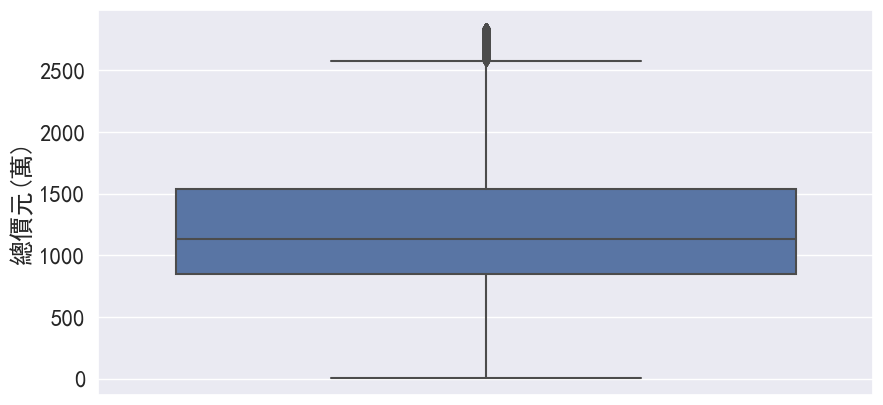

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=new_df_resident_without["總價元(萬)"])
#sns.boxplot(y=new_df_resident_without["單價元坪(萬)"])

2. 繪出直方圖檢視數值是否近於常態分佈，數值顯示右偏：眾數＜中位數＜平均數

<Axes: xlabel='總價元(萬)', ylabel='Count'>

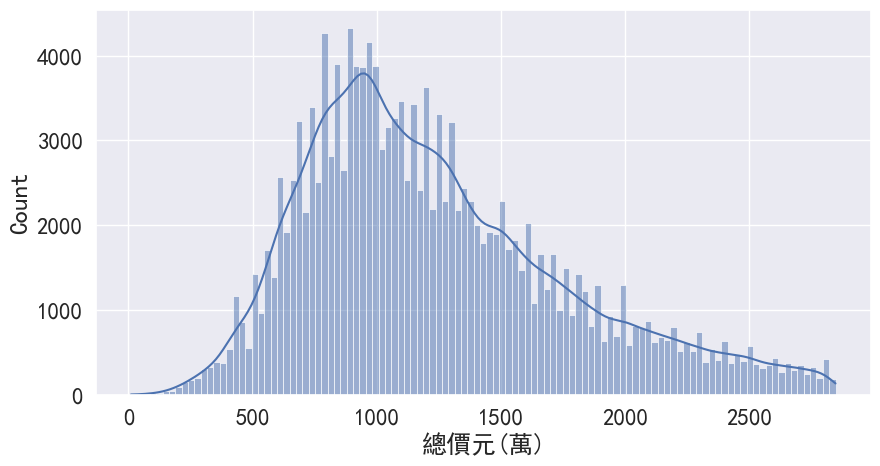

In [16]:
sns.histplot(data=new_df_resident_without,x="總價元(萬)",kde=True)

## 4)資料視覺化 ＃將利用視覺化圖表呈現下列資料


1. 哪一個行政區的交易件數最多? 林口在交易數排名位居第幾？
2. 房價排名哪一區最高？林口在房價排名位居第幾？
3. 利用單價相近與交易件數相近行政區與林口做逐年比較
4. 比較相近的行政區交易坪數比較
5. 結論

In [17]:
df_resident_case=new_df_resident_without.groupby(['鄉鎮市區']).size().reset_index(name="件數").sort_values('件數', ascending=False)

In [19]:
df_resident_case

,鄉鎮市區,件數
11,板橋區,20033
17,淡水區,19327
10,新莊區,15290
3,中和區,13387
12,林口區,10361
15,汐止區,10326
9,新店區,10170
2,三重區,10046
6,土城區,8602
24,蘆洲區,6245


1. 哪一個行政區的交易件數最多? 林口在交易數排名位居第幾？
  - 板橋區交易件數最多6年內有**20033**件，林口區交易數為新北市排第五，與汐止區、新店區、三重區相近交易數約在**10000**筆



<Axes: xlabel='鄉鎮市區', ylabel='件數'>

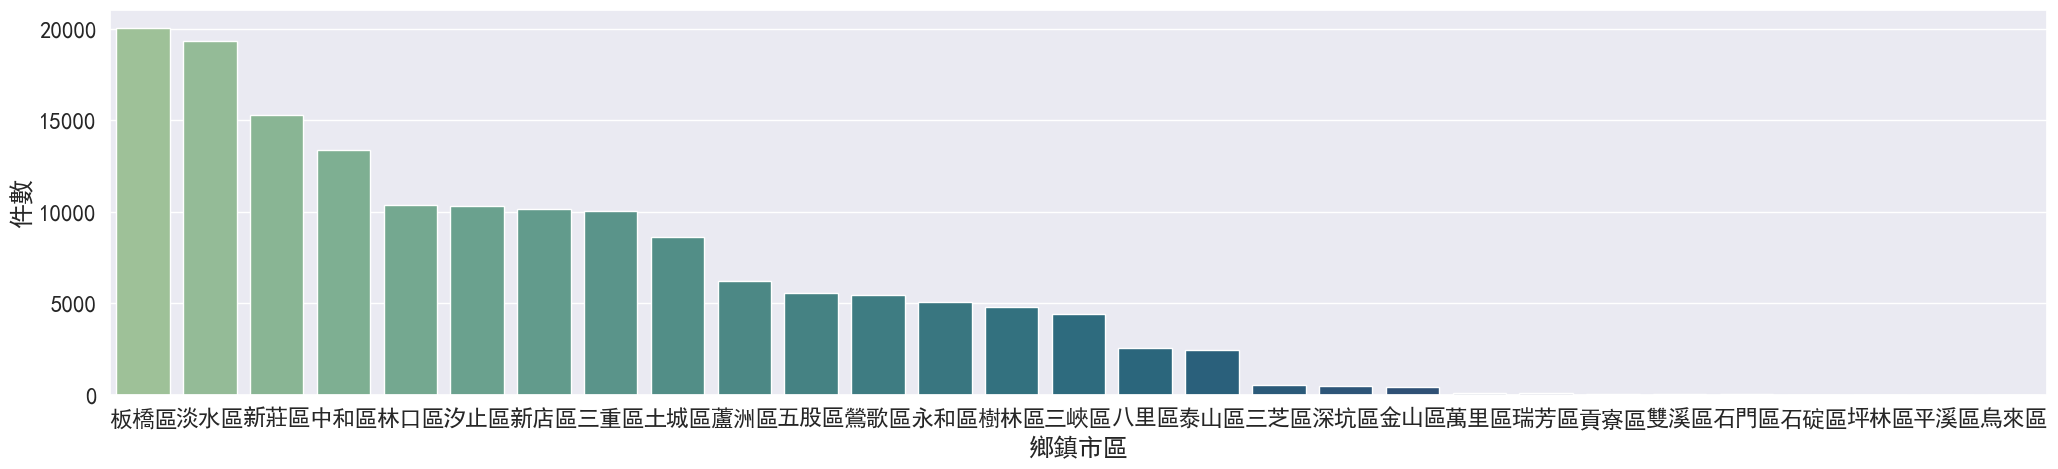

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(25,5),"font.sans-serif":'simhei'},font_scale=1.5)

sns.barplot(x="鄉鎮市區",y="件數",data=df_resident_case,errorbar=None,palette=sns.color_palette("crest",23))


2. 房價排名哪一區最高？林口在房價排名位居第幾？

  - 永和區房價最高約為一坪44.4萬，林口則排名居中為第14名房價約為一坪29.3萬。

In [55]:
new_df_resident_unitprice=new_df_resident_without.groupby(['鄉鎮市區'])['單價元坪(萬)'].mean().reset_index().sort_values('單價元坪(萬)',ascending=False)
new_df_resident_unitprice

,鄉鎮市區,單價元坪(萬)
14,永和區,44.392647
9,新店區,40.601628
3,中和區,40.164571
2,三重區,39.362645
8,平溪區,39.145920
11,板橋區,37.149384
10,新莊區,35.735814
6,土城區,35.064476
24,蘆洲區,35.033302
19,烏來區,34.972410


<Axes: xlabel='鄉鎮市區', ylabel='單價元坪(萬)'>

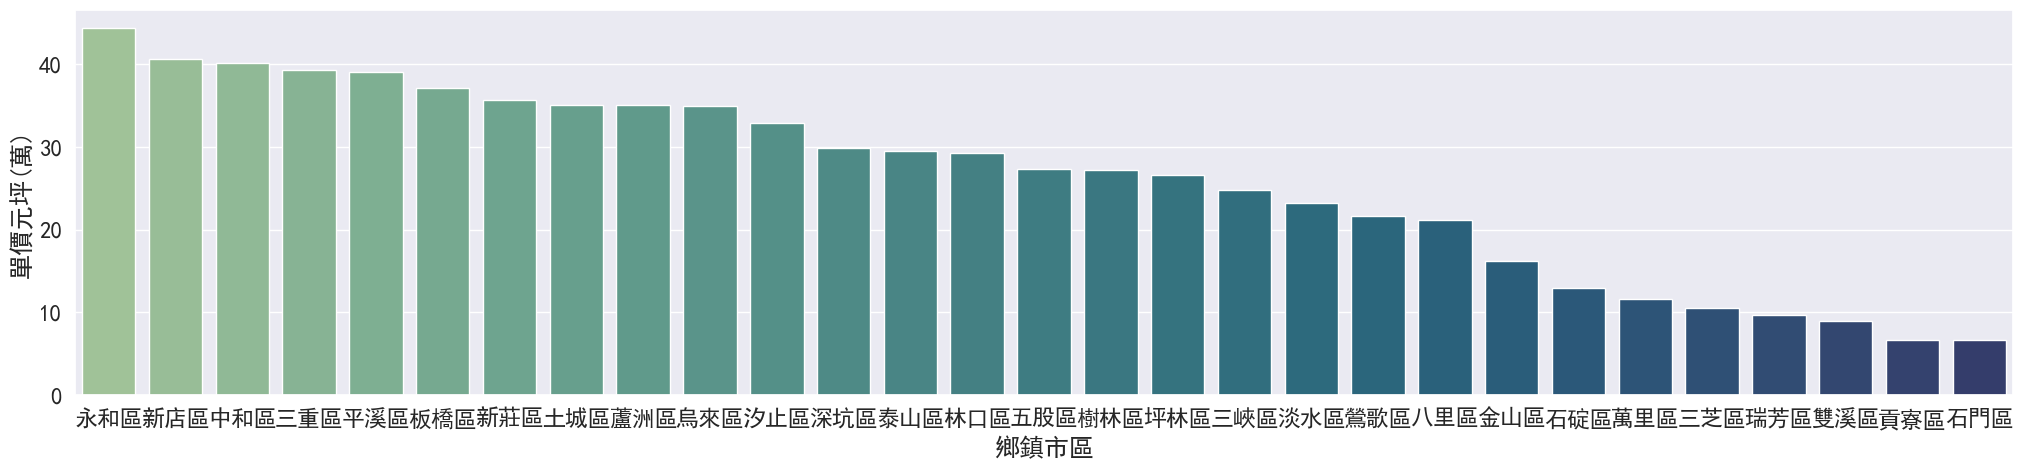

In [58]:

sns.barplot(x="鄉鎮市區",y="單價元坪(萬)",data=new_df_resident_unitprice,palette=sns.color_palette("crest",29))

In [50]:
new_df_year=new_df_resident_without.groupby(['鄉鎮市區','年份'])['單價元坪(萬)'].agg(['mean','count']).reset_index().rename(columns={'mean':'單價元坪(萬)','count':'件數'})
new_df_year

,鄉鎮市區,年份,單價元坪(萬),件數
0,三峽區,2017,20.151211,1086
1,三峽區,2018,25.262900,625
2,三峽區,2019,23.903089,993
3,三峽區,2020,25.746612,714
4,三峽區,2021,27.830736,501
...,...,...,...,...
154,鶯歌區,2018,19.754076,1112
155,鶯歌區,2019,19.721806,1036
156,鶯歌區,2020,22.331183,1195
157,鶯歌區,2021,24.706160,691


3. 與相近行政區比較利用單價相近與交易件數相近行政區與林口做逐年比較年度交易數變化
- 在件數相近的行政區中比較單價，林口相較於其他行政區是最有房價優勢
- 在單價相近的行政區比較件數，林口區的交易件數則遠超過其他區域

In [46]:
df_data_simiprice=new_df_year[(new_df_year['鄉鎮市區']=='深坑區')|(new_df_year['鄉鎮市區']=='泰山區')|(new_df_year['鄉鎮市區']=='林口區')|(new_df_year['鄉鎮市區']=='五股區')|(new_df_year['鄉鎮市區']=='樹林區')]
df_data_simicase=new_df_year[(new_df_year['鄉鎮市區']=='土城區')|(new_df_year['鄉鎮市區']=='三重區')|(new_df_year['鄉鎮市區']=='林口區')|(new_df_year['鄉鎮市區']=='汐止區')|(new_df_year['鄉鎮市區']=='新店區')]
df_data_area=new_df_year[(new_df_year['鄉鎮市區']=='土城區')
                                         |(new_df_year['鄉鎮市區']=='三重區')
                                         |(new_df_year['鄉鎮市區']=='林口區')
                                         |(new_df_year['鄉鎮市區']=='汐止區')
                                         |(new_df_year['鄉鎮市區']=='新店區')
                                         |(new_df_year['鄉鎮市區']=='深坑區')
                                         |(new_df_year['鄉鎮市區']=='泰山區')
                                         |(new_df_year['鄉鎮市區']=='五股區')
                                         |(new_df_year['鄉鎮市區']=='樹林區')]

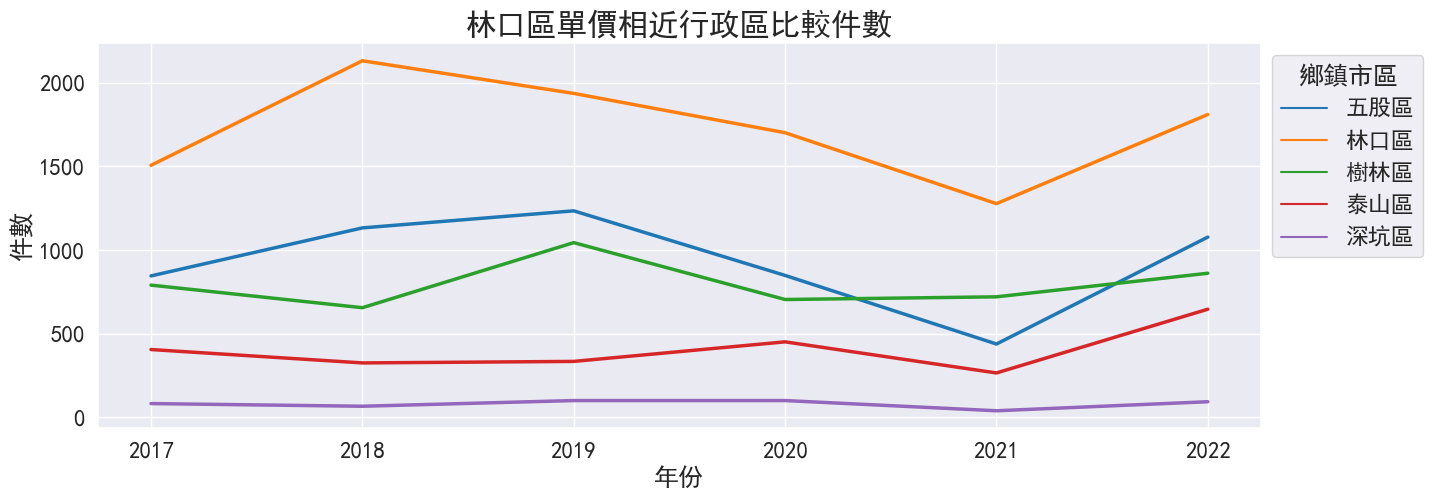

In [47]:
sns.set(rc = {'figure.figsize':(15,5),"font.sans-serif":'simhei'},font_scale=1.5)
ax_1=sns.lineplot(data=df_data_simiprice,x="年份", y='件數',hue="鄉鎮市區", palette="tab10", linewidth=2.5)
plt.title('林口區交易單價相近行政區比較件數', size = 22)
plt.xlabel("年份", fontsize=18)
plt.ylabel("件數", fontsize=18)
sns.move_legend(ax_1, "upper left", bbox_to_anchor=(1, 1))

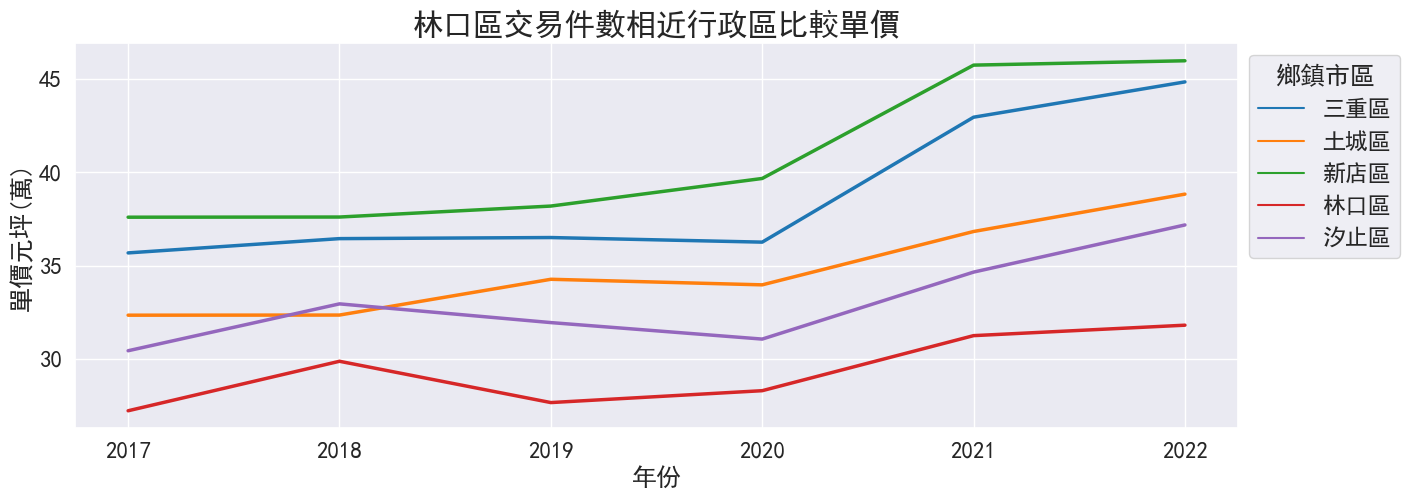

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15,5),"font.sans-serif":'simhei'},font_scale=1.5)
ax_2=sns.lineplot(data=df_data_simicase,x="年份", y="單價元坪(萬)",hue="鄉鎮市區", palette="tab10",err_style=None,linewidth=2.5)
plt.title('林口區交易件數相近行政區比較單價', size = 22)
plt.xlabel("年份", fontsize=18)
plt.ylabel("單價元坪(萬)", fontsize=18)
sns.move_legend(ax_2, "upper left", bbox_to_anchor=(1, 1))

4. 比較相近的行政區交易坪數比較
- 林口區相較其他行政區交易坪數為最高，消費者願意在林口購買較大坪數的物件


In [64]:
new_df_year

,鄉鎮市區,年份,單價元坪(萬),件數
0,三峽區,2017,20.151211,1086
1,三峽區,2018,25.262900,625
2,三峽區,2019,23.903089,993
3,三峽區,2020,25.746612,714
4,三峽區,2021,27.830736,501
...,...,...,...,...
154,鶯歌區,2018,19.754076,1112
155,鶯歌區,2019,19.721806,1036
156,鶯歌區,2020,22.331183,1195
157,鶯歌區,2021,24.706160,691


In [66]:
new_df_year.groupby(['鄉鎮市區'])['件數'].sum().reset_index().sort_values('件數', ascending=False)

,鄉鎮市區,件數
11,板橋區,20033
17,淡水區,19327
10,新莊區,15290
3,中和區,13387
12,林口區,10361
15,汐止區,10326
9,新店區,10170
2,三重區,10046
6,土城區,8602
24,蘆洲區,6245


In [69]:
df_data_area=new_df_resident_without[(new_df_resident_without['鄉鎮市區']=='土城區')
                                         |(new_df_resident_without['鄉鎮市區']=='三重區')
                                         |(new_df_resident_without['鄉鎮市區']=='林口區')
                                         |(new_df_resident_without['鄉鎮市區']=='汐止區')
                                         |(new_df_resident_without['鄉鎮市區']=='新店區')
                                         |(new_df_resident_without['鄉鎮市區']=='深坑區')
                                         |(new_df_resident_without['鄉鎮市區']=='泰山區')
                                         |(new_df_resident_without['鄉鎮市區']=='五股區')
                                         |(new_df_resident_without['鄉鎮市區']=='樹林區')]

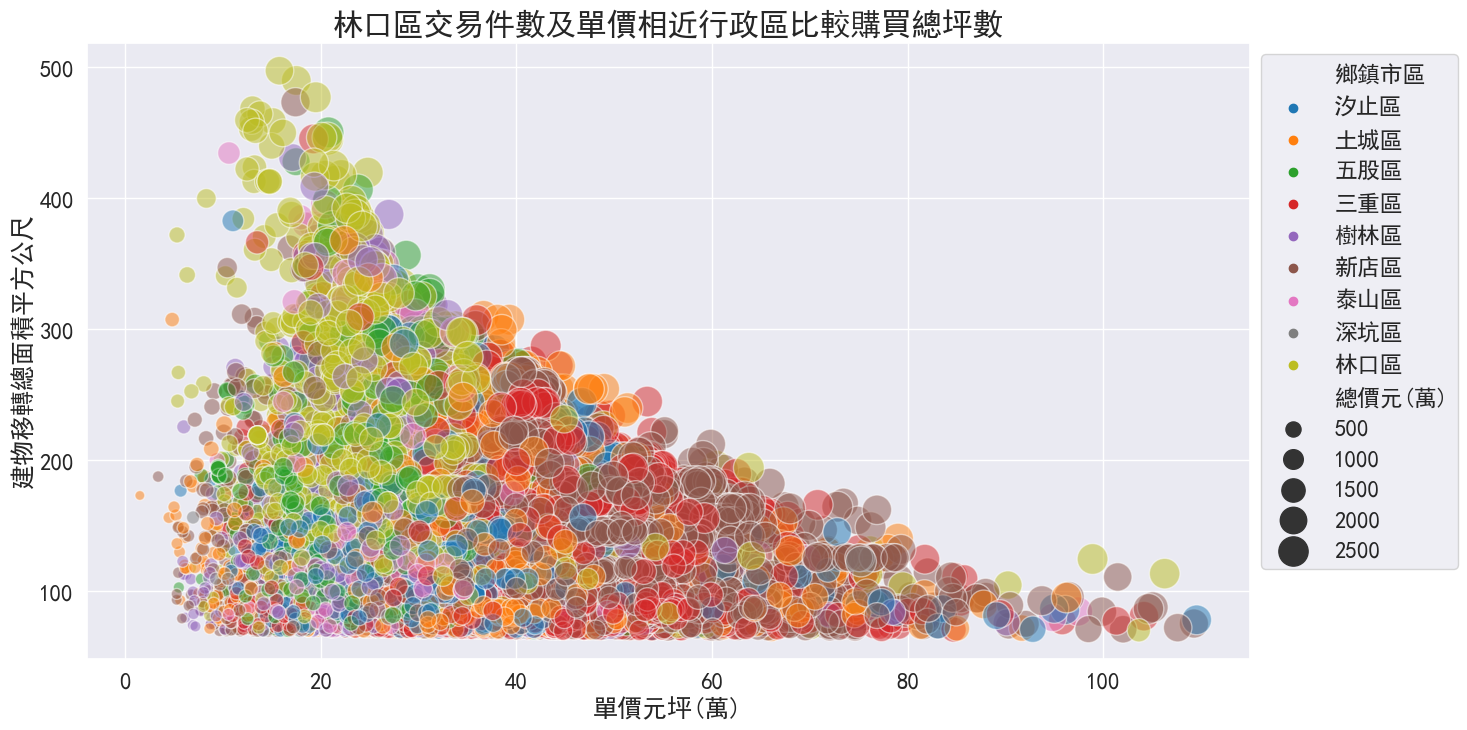

In [72]:
ax_4=plt.figure(figsize=(15, 8))
ax_4=sns.scatterplot(data=df_data_area,x="單價元坪(萬)", y="建物移轉總面積平方公尺",hue="鄉鎮市區", palette="tab10",alpha=.5, size='總價元(萬)',sizes=(50,500))
plt.title('林口區交易件數及單價相近行政區比較購買總坪數', size = 22)
plt.xlabel("單價元坪(萬)", fontsize=18)
plt.ylabel("建物移轉總面積平方公尺", fontsize=18)
sns.move_legend(ax_4, "upper left", bbox_to_anchor=(1, 1))

## 結論
- 2018年林口區出現一波購屋的高潮，由於相較於其他新北市熱區林口房價較低，在相近房價的區域則擁有較好的生活機能而出線。
- 另外消費者也傾向在林口購買較高坪數的物件，由此點可推估購買林口的消費者大多數是自住需求，對於生活空間有較高的要求。
- 以房價、交易件數及交易坪數來推估，林口區在新北市區域中具優勢擁有自住家庭型的消費者引力，以2022交易件數上升的走勢未來林口移入人數還有可能繼續增長。